In [96]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, confusion_matrix



In [75]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Consumer Purchase Habit/Customer Purchasing Behaviors.csv')
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [76]:
df.set_index('user_id')

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
user_id,,,,,,
1,25,45000,200,4.5,North,12
2,34,55000,350,7.0,South,18
3,45,65000,500,8.0,West,22
4,22,30000,150,3.0,East,10
5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...
234,40,60000,450,7.2,West,20
235,38,59000,430,6.9,North,20
236,54,74000,630,9.4,South,27


In [77]:
df.sort_values('region')

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
3,4,22,30000,150,3.0,East,10
29,30,40,60000,450,7.2,East,22
13,14,37,58000,420,6.8,East,20
7,8,27,43000,230,4.2,East,14
19,20,26,44000,240,4.3,East,14
...,...,...,...,...,...,...,...
167,168,50,70000,600,9.0,West,25
110,111,49,69000,590,8.9,West,24
164,165,52,72000,610,9.2,West,26
191,192,37,58000,420,6.8,West,20


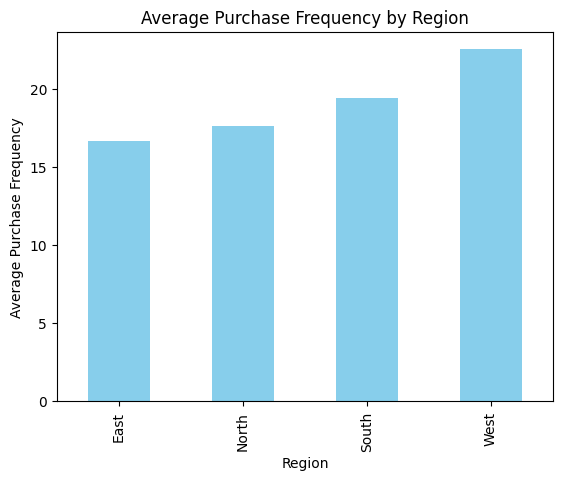

In [78]:
import matplotlib.pyplot as plt

region_data = df.groupby('region')['purchase_frequency'].mean()

region_data.plot(kind='bar', color='skyblue', title='Average Purchase Frequency by Region')
plt.ylabel('Average Purchase Frequency')
plt.xlabel('Region')
plt.show()


In [79]:
age_per_region = df.groupby('region')['age'].mean()

income_per_region = df.groupby('region')['annual_income'].mean()

print(f"Average age per region is {age_per_region}")
      
print(f"average anual income per region is {income_per_region}")


Average age per region is region
East     31.666667
North    34.358974
South    38.000000
West     44.272727
Name: age, dtype: float64
average anual income per region is region
East     49000.000000
North    53038.461538
South    55766.233766
West     64129.870130
Name: annual_income, dtype: float64


In [80]:
df['purchase_frequency'].mean()

19.798319327731093

In [81]:
threshold = 19
df['target'] = (df['purchase_frequency'] > threshold).astype(int)

In [82]:
X = df[['age', 'annual_income', 'loyalty_score']]  # Choose relevant columns
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        43

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Confusion Matrix:
[[29  0]
 [ 0 43]]


In [85]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [86]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
         Feature  Importance
1  annual_income    0.364761
0            age    0.362639
2  loyalty_score    0.272600


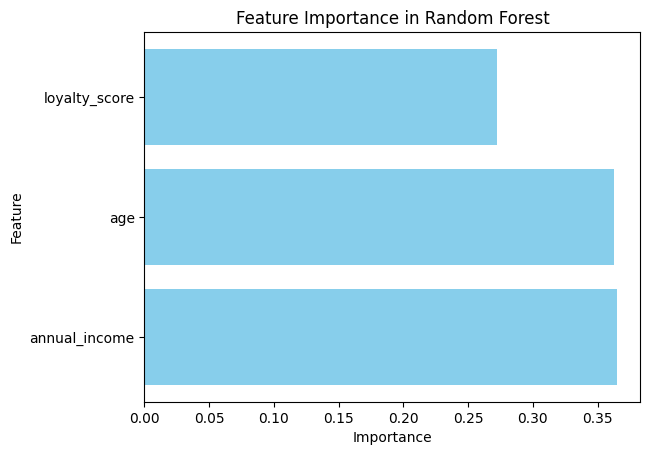

In [87]:

plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


In [88]:
X = df[['loyalty_score', 'annual_income', 'age']]

print(X.isnull().sum())

print(X.dtypes)


loyalty_score    0
annual_income    0
age              0
dtype: int64
loyalty_score    float64
annual_income      int64
age                int64
dtype: object


Cluster Means:
            user_id        age  annual_income  purchase_amount  loyalty_score  \
cluster                                                                         
0        123.000000  49.805195   69818.181818       579.740260       8.828571   
1        111.610169  26.779661   41915.254237       230.338983       4.091525   
2        121.421569  37.156863   57000.000000       422.254902       6.821569   

         purchase_frequency    target  cluster  
cluster                                         
0                 24.688312  1.000000      0.0  
1                 13.508475  0.000000      1.0  
2                 19.745098  0.588235      2.0  


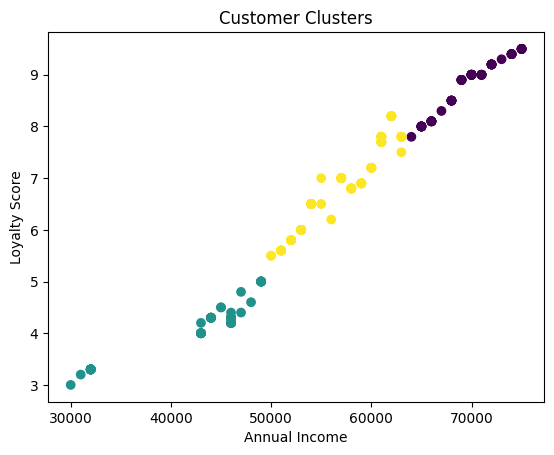

In [89]:
from sklearn.cluster import KMeans

X = df[['loyalty_score', 'annual_income', 'age']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

numeric_cols = df.select_dtypes(include=['number']).columns
cluster_means = df.groupby('cluster')[numeric_cols].mean()

print("Cluster Means:")
print(cluster_means)

plt.scatter(df['annual_income'], df['loyalty_score'], c=df['cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Loyalty Score')
plt.title('Customer Clusters')
plt.show()


In [90]:
# Define high-value customer criteria
high_value_customers = df[
    (df['loyalty_score'] > 8) & 
    (df['annual_income'] > 65000) & 
    (df['age'] > 40)  # Example age threshold
]
print(high_value_customers)


     user_id  age  annual_income  purchase_amount  loyalty_score region  \
8          9   50          70000              600            9.0  North   
14        15   49          69000              590            8.9   West   
18        19   46          66000              510            8.1  North   
20        21   52          72000              610            9.2  South   
25        26   47          67000              530            8.3   West   
..       ...  ...            ...              ...            ...    ...   
222      223   46          66000              510            8.1  North   
224      225   52          72000              610            9.2   West   
227      228   50          70000              600            9.0   West   
230      231   49          69000              590            8.9   West   
235      236   54          74000              630            9.4  South   

     purchase_frequency  target  cluster  
8                    25       1        0  
14           

In [91]:
region_counts = high_value_customers['region'].value_counts()
print(region_counts)


region
West     43
North    16
South     9
Name: count, dtype: int64


/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_72561/3914687559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


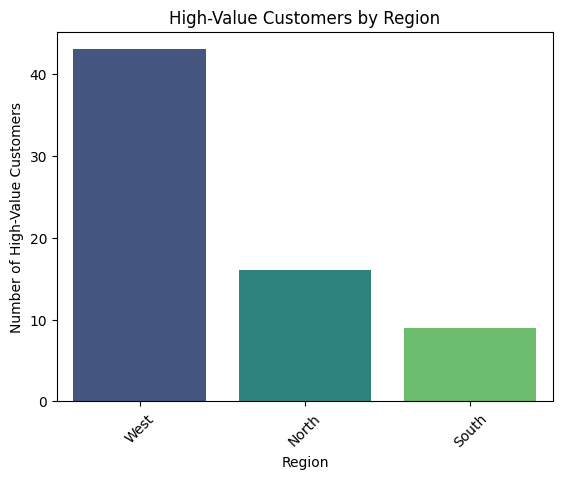

In [94]:
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('High-Value Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of High-Value Customers')
plt.xticks(rotation=45)
plt.show()